Mounted at /content/drive


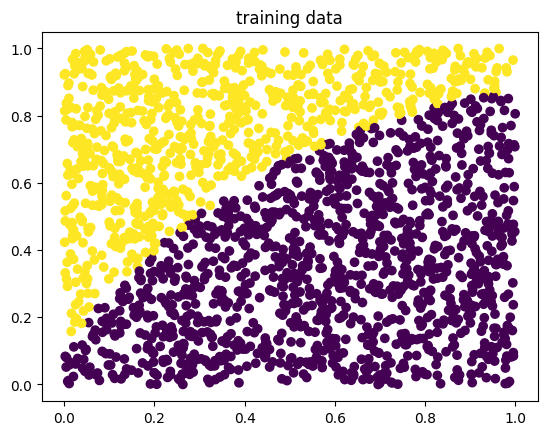

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
drive.mount('/content/drive')

pkl_file = open('/content/drive/My Drive/Colab Notebooks/532/data/classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)
x_train = np.hstack((x_train, np.ones(y_train.shape)))

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

In [3]:
#Binary linear classifier

def graddescent(X,y,tau,w_init,it):
  lam = 1
  """
  compute 10 iterations of gradient descent starting at w1
  w_{k+1}= w_k - tau*X'*(X*w_k - y)
  """
  W = np.zeros((w_init.shape[0],it))
  W[:,[0]] = w_init
  for k in range(it-1):
    loss_dir = np.zeros((1,3))
    loss_sum = 0
    for i in range(y.shape[0]):
      loss_dir += -y[i] / (1+np.exp(y[i]*(X[i].T@W[:, [k]])))*X[i]
      loss_sum += np.log(1 + np.exp((-y[i]*(X[i].T)@W[:, [k]])[0]))

    loss_total = loss_sum + ((np.linalg.norm(W[:, [k]])**2) * lam)
    #print(loss_total)
    loss_grad = loss_dir.reshape(3,1) + (W[:, [k]]) * 2 * lam
    W[:,[k+1]] = W[:,[k]] - tau * loss_grad
  return W

w_init = np.array([-1,1, -0.1]).reshape(-1,1)

#W = graddescent(x_train, y_train, 0.1, w_init, 1)

In [4]:
W_pred = graddescent(x_train, y_train, 0.001, w_init, 1000)
preds = np.zeros((y_train.shape))
for index, row in enumerate(x_train):
  preds[index] = np.sign(row @ W_pred[:, [-1]])
print(W_pred[:, -1])

[-6.44673471  9.21873374 -2.55234242]


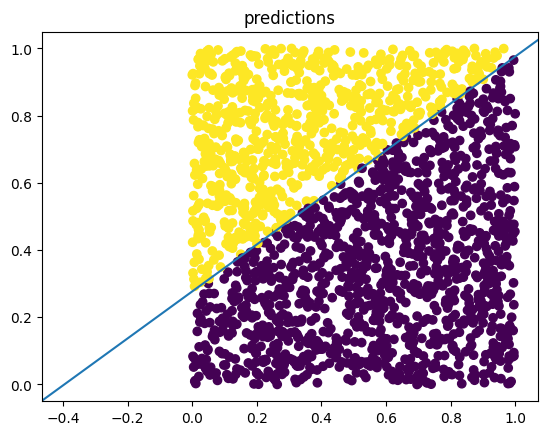

In [15]:
plt.scatter(x_train[:,0],x_train[:,1], c=preds[:,0])
plt.title('predictions')

#line -6.44x+9.218y-2.55=0
final_w = (W_pred[:, -1])

plt.axline((0, -final_w[2]/final_w[1]), (-final_w[2]/final_w[0], 0))
plt.show()

In [6]:
#error rate
errors = 0
for idx, val in enumerate(y_train):
  if int(val[0]) != int(preds[idx][0]):
    errors += 1
print(errors/len(y_train))

0.035


[-1.39655874  2.29068083 -0.6846757 ]


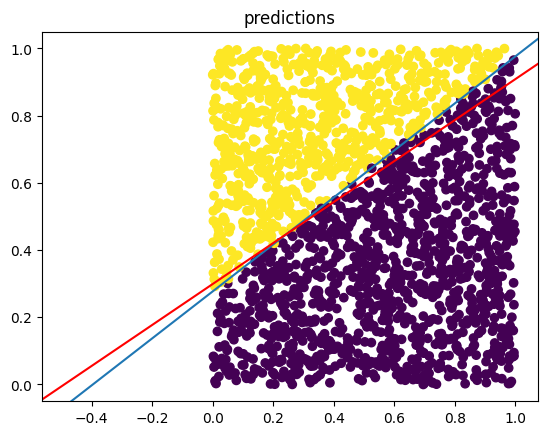

In [7]:
#Squared Error Loss
w_sq = (np.linalg.inv(x_train.T@x_train + np.identity((x_train.T).shape[0]))@x_train.T@y_train).ravel()

plt.scatter(x_train[:,0],x_train[:,1], c=preds[:,0])
plt.title('predictions')

#line -6.44x+9.218y-2.55=0
final_w = (W_pred[:, -1])

print(w_sq)
plt.axline((0, -final_w[2]/final_w[1]), (-final_w[2]/final_w[0], 0))
plt.axline((0, -w_sq[2]/w_sq[1]), (-w_sq[2]/w_sq[0], 0), color = "red")
plt.show()
#The least squares boundary has more errors

In [27]:
x_train_extra = np.hstack((np.full((1000, 1), 10), np.full((1000, 1), 0), np.full((1000, 1), 1)))
y_train_extra = np.full((1000, 1), -1)

x_train_aug = np.vstack((x_train, x_train_extra))
y_train_aug = np.vstack((y_train, y_train_extra))

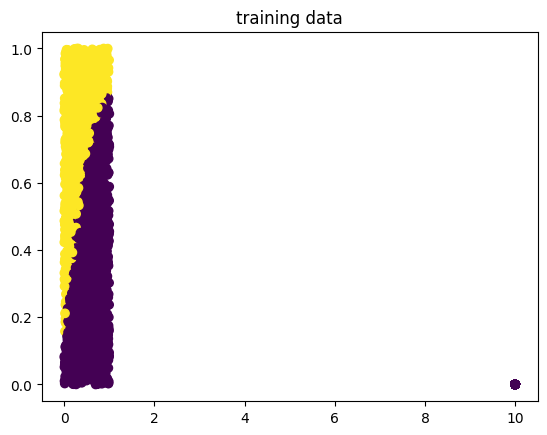

In [29]:
plt.scatter(x_train_aug[:,0],x_train_aug[:,1], c=y_train_aug[:,0])
plt.title('training data')
plt.show()

[-5.42455208  7.75950846 -2.17250833]


Text(0.5, 1.0, 'predictions')

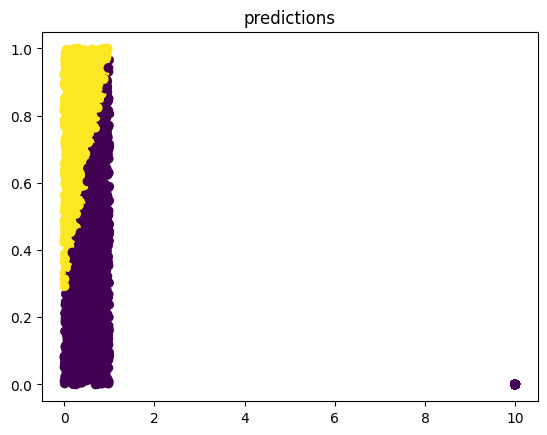

In [32]:
W_pred = graddescent(x_train_aug, y_train_aug, 0.001, w_init, 200)
preds = np.zeros((y_train_aug.shape))
for index, row in enumerate(x_train_aug):
  preds[index] = np.sign(row @ W_pred[:, [-1]])
print(W_pred[:, -1])
plt.scatter(x_train_aug[:,0],x_train_aug[:,1], c=preds[:,0])
plt.title('predictions')


[ 0.03355812  2.25926458 -1.36073308]


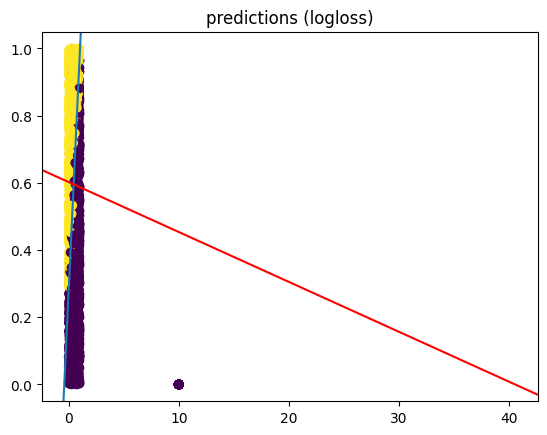

In [33]:
#Squared Error Loss
w_sq = (np.linalg.inv(x_train_aug.T@x_train_aug + np.identity((x_train_aug.T).shape[0]))@x_train_aug.T@y_train_aug).ravel()

plt.scatter(x_train_aug[:,0],x_train_aug[:,1], c=preds[:,0])
plt.title('predictions (logloss)')

final_w = (W_pred[:, -1])

print(w_sq)
plt.axline((0, -final_w[2]/final_w[1]), (-final_w[2]/final_w[0], 0))
plt.axline((0, -w_sq[2]/w_sq[1]), (-w_sq[2]/w_sq[0], 0), color = "red")
plt.show()
#The least squares boundary is doing terribly as expected. The error^2 of the (10,0) points is very large.